<font color='green' size = 5> ECEN 4005 Homework # 6</font>



In [24]:
# Importing packages, modules.
import numpy as np
import qutip as qt

%matplotlib notebook
import matplotlib.pyplot as plt

from scipy.sparse import diags, linalg, kron

<font color='green' size = 5> Problem 1 (b)</font>



In [25]:
L     = 500e-9 # m length the box 
N_pts = 101 # number of points for the phase space

phi_pts = np.linspace(-L/2, L/2, N_pts) # phi vector

dp        = phi_pts[-1] - phi_pts[-2] # distance between points
d1_coeff  = (1. / (2. * dp)) # coefficient for the first derivative
d2_coeff  = (1. / (dp ** 2)) # coefficient for the second derivative

# defining operators for open boundary conditions
id_op = diags(np.ones(phi_pts.size), 0, shape=(N_pts,N_pts))
x_op  = diags(phi_pts, 0, shape=(N_pts,N_pts))
x2_op = diags(phi_pts**2, 0, shape=(N_pts,N_pts))
d1x   = diags([-d1_coeff, d1_coeff], [-1,1], shape=(N_pts,N_pts))
d2x   = diags([d2_coeff, -2.0 * d2_coeff, d2_coeff], [-1,0,1], shape=(N_pts,N_pts))


In [26]:
# first derivative operator
d1x.toarray() / d1_coeff;

In [27]:
# second derivative operator
d2x.toarray() / d2_coeff;

In [28]:
# x^2 operator
x2_op.toarray();

In [29]:
hbar = 6.582e-16 # eV s
m_e  = 5.685e-12 # eV s2/m2 free electron mass
m    = m_e * 0.063 # eV s2/m2 electron mass in GaAs
E1 = ((hbar ** 2) / (2*m))
omega = (2*(np.pi)*(200*(10**9)))
coeff2 = 0.5*m*(omega**2)
# the Hamiltonian of the box
H = -E1*(kron(d2x, id_op) + kron(id_op,d2x)) + coeff2*(kron(x2_op, id_op) + kron(id_op,x2_op))
print('The Hamiltonian is: ')
H.toarray()

The Hamiltonian is: 


array([[ 0.13211714, -0.02419216,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02419216,  0.13141724, -0.02419216, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.02419216,  0.13073148, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.13073148,
        -0.02419216,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.02419216,
         0.13141724, -0.02419216],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.02419216,  0.13211714]])

<font color='green' size = 5> Problem 1 (c)</font>

In [30]:
# solve numerically the Hamiltonian for the first k=25 energy levels
evals, ekets = linalg.eigsh(H, k=25, which='SA')

# sort the eigenenergies and eigenvalues
sort_idxs    = evals.argsort()
evals        = np.sort(evals)
zero_energy  = evals[0]
evals        = evals - zero_energy # Define the 0 energy with respect to the lowest lying state.
ekets        = [ekets[:,idx].reshape([N_pts, N_pts]) for idx in sort_idxs] # reshaping the wavefunctions for 2D

<IPython.core.display.Javascript object>


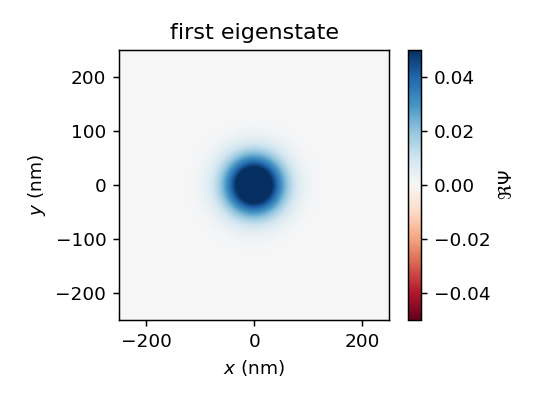

In [31]:
fig, axs = plt.subplots(figsize=(4,3))

im1 = axs.imshow(np.real(ekets[0][:,:]),
           extent = [phi_pts[0] * 1e9, phi_pts[-1] * 1e9, phi_pts[0] * 1e9, phi_pts[-1] * 1e9], 
           cmap='RdBu', vmin=-0.05, vmax=0.05)

fig.colorbar(im1, ax=axs, label = r'$\Re\Psi$')
axs.set_xlabel(r'$x$ (nm)')
axs.set_ylabel(r'$y$ (nm)')
axs.set_title('first eigenstate')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


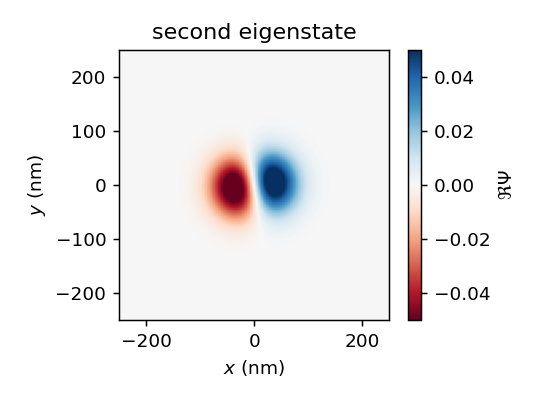

In [32]:
fig, axs = plt.subplots(figsize=(4,3))

im1 = axs.imshow(np.real(ekets[1][:,:]),
           extent = [phi_pts[0] * 1e9, phi_pts[-1] * 1e9, phi_pts[0] * 1e9, phi_pts[-1] * 1e9], 
           cmap='RdBu', vmin=-0.05, vmax=0.05)

fig.colorbar(im1, ax=axs, label = r'$\Re\Psi$')
axs.set_xlabel(r'$x$ (nm)')
axs.set_ylabel(r'$y$ (nm)')
axs.set_title('second eigenstate')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


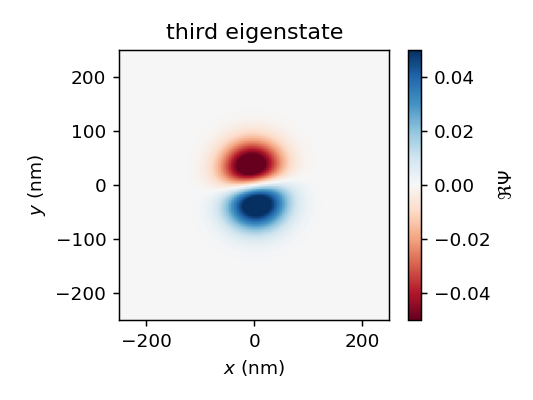

In [33]:
fig, axs = plt.subplots(figsize=(4,3))

im1 = axs.imshow(np.real(ekets[2][:,:]),
           extent = [phi_pts[0] * 1e9, phi_pts[-1] * 1e9, phi_pts[0] * 1e9, phi_pts[-1] * 1e9], 
           cmap='RdBu', vmin=-0.05, vmax=0.05)

fig.colorbar(im1, ax=axs, label = r'$\Re\Psi$')
axs.set_xlabel(r'$x$ (nm)')
axs.set_ylabel(r'$y$ (nm)')
axs.set_title('third eigenstate')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


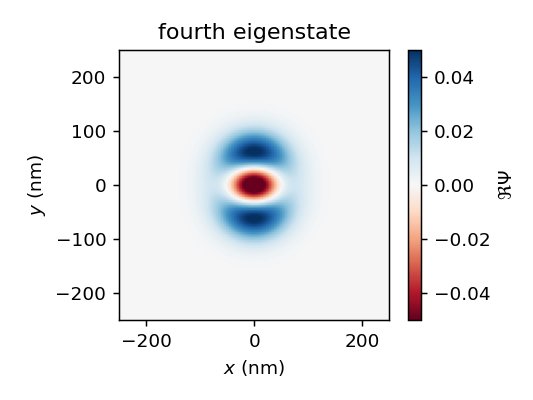

In [34]:
fig, axs = plt.subplots(figsize=(4,3))

im1 = axs.imshow(np.real(ekets[3][:,:]),
           extent = [phi_pts[0] * 1e9, phi_pts[-1] * 1e9, phi_pts[0] * 1e9, phi_pts[-1] * 1e9], 
           cmap='RdBu', vmin=-0.05, vmax=0.05)

fig.colorbar(im1, ax=axs, label = r'$\Re\Psi$')
axs.set_xlabel(r'$x$ (nm)')
axs.set_ylabel(r'$y$ (nm)')
axs.set_title('fourth eigenstate')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


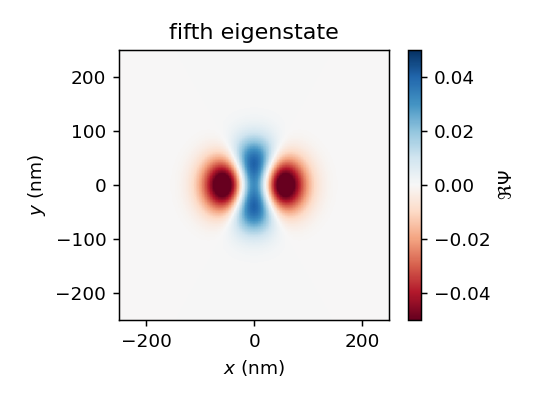

In [35]:
fig, axs = plt.subplots(figsize=(4,3))

im1 = axs.imshow(np.real(ekets[4][:,:]),
           extent = [phi_pts[0] * 1e9, phi_pts[-1] * 1e9, phi_pts[0] * 1e9, phi_pts[-1] * 1e9], 
           cmap='RdBu', vmin=-0.05, vmax=0.05)

fig.colorbar(im1, ax=axs, label = r'$\Re\Psi$')
axs.set_xlabel(r'$x$ (nm)')
axs.set_ylabel(r'$y$ (nm)')
axs.set_title('fifth eigenstate')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


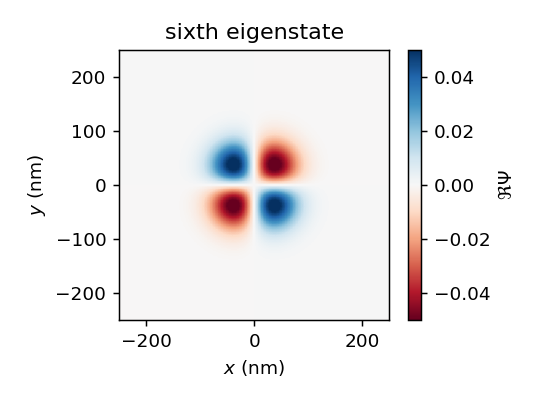

In [36]:
fig, axs = plt.subplots(figsize=(4,3))

im1 = axs.imshow(np.real(ekets[5][:,:]),
           extent = [phi_pts[0] * 1e9, phi_pts[-1] * 1e9, phi_pts[0] * 1e9, phi_pts[-1] * 1e9], 
           cmap='RdBu', vmin=-0.05, vmax=0.05)

fig.colorbar(im1, ax=axs, label = r'$\Re\Psi$')
axs.set_xlabel(r'$x$ (nm)')
axs.set_ylabel(r'$y$ (nm)')
axs.set_title('sixth eigenstate')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


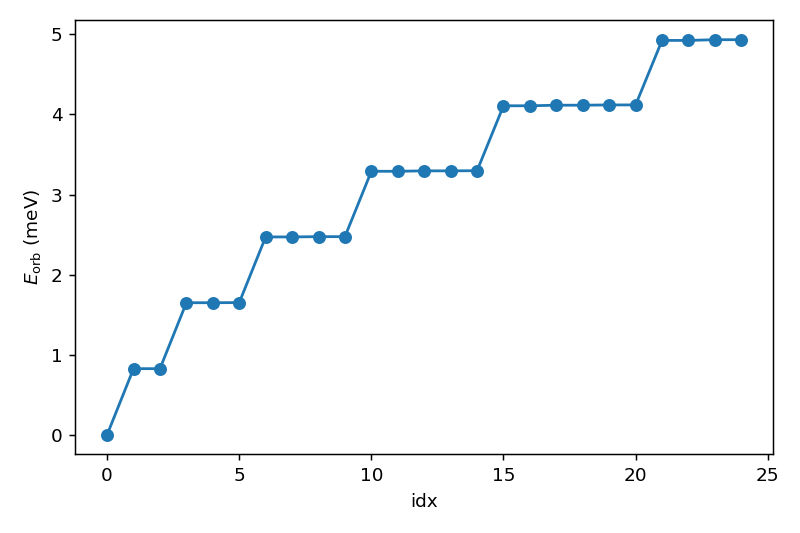

In [37]:
# plot the first 10 orbital energies

fig, axs = plt.subplots(figsize=(6,4))

axs.plot(np.arange(0,25), evals[0:25] * 1e3, '-o')

axs.set_xlabel(r'idx')
axs.set_ylabel(r'$E_\mathrm{orb}$ (meV)')

plt.tight_layout()
plt.show()

<font color='green' size = 5> Problem 1 (d)</font>

In [38]:
#charging energy
e = 1.60e-19
er = 12.9
e0 = 8.85e-12
r = 100e-9
d = 10e-9
A = np.pi*r*r;
C = er*e0*(A/d)
Ec = ((e*e)/(2*C))*(1/(1.60e-19*1e-3))
print(Ec)

0.22305251955243072


<font color='green' size = 5> Problem 1 (e)</font>

<IPython.core.display.Javascript object>


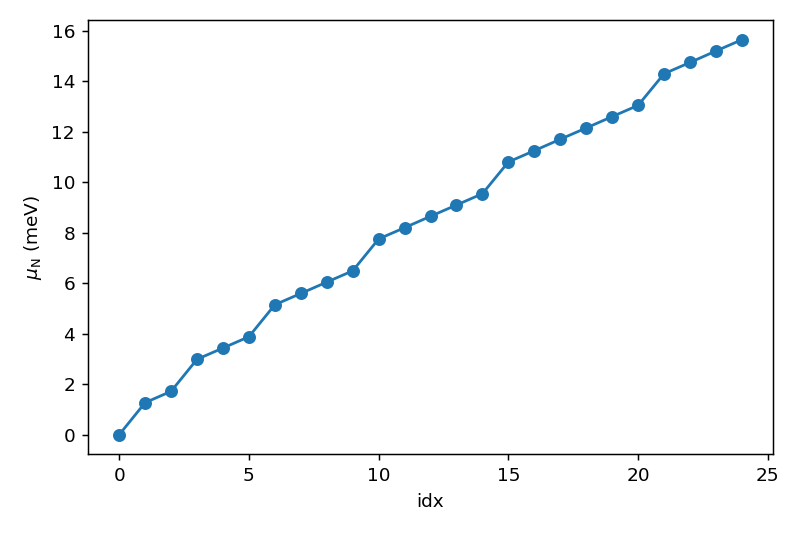

In [39]:
# chemical potential

muN = (2*(np.arange(0,25))*Ec) + (evals[0:25])*(1e3)

fig, axs = plt.subplots(figsize=(6,4))

axs.plot(np.arange(0,25), muN, '-o')

axs.set_xlabel(r'idx')
axs.set_ylabel(r'$\mu_\mathrm{N}$ (meV)')

plt.tight_layout()
plt.show()




<font color='green' size = 5> Problem 1 (f)</font>

<IPython.core.display.Javascript object>


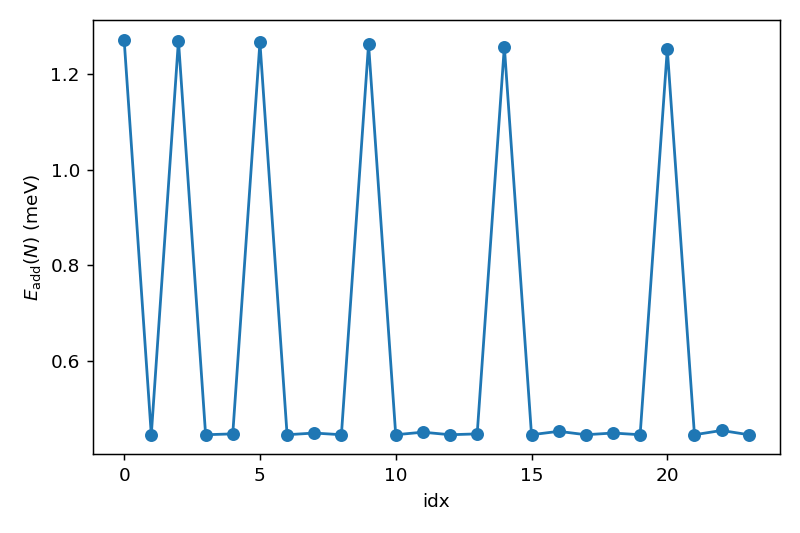

In [40]:
EaddN = np.zeros(24);
for i in np.arange(0,24):
    EaddN[i] = muN[i+1]-muN[i]
    
fig, axs = plt.subplots(figsize=(6,4))

axs.plot(np.arange(0,24), EaddN, '-o')

axs.set_xlabel(r'idx')
axs.set_ylabel(r'$E_\mathrm{add}(N)$ (meV)')

plt.tight_layout()
plt.show()

In [41]:
# import packages and modules
import numpy as np
import qutip as qt
from qutip.qip.operations import x_gate, y_gate, z_gate, s_gate, t_gate, snot, rx, ry, rz, swap ,iswap, swapalpha,cnot, cz_gate, globalphase
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

<font color='green' size = 5> Problem 2 (b)</font>



In [42]:
# define qubit states
psi0 = qt.basis(2,0)
psi1 = qt.basis(2,1)
plus = (psi0 + psi1).unit()
minus = (psi0 - psi1).unit()

# define operators 
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()
si = qt.qeye(2)
sm = qt.Qobj([[0,1],[0,0]])

# define quantities to evaluate
M0 = psi0*psi0.dag() # |0><0| measurement operator
M1 = psi1*psi1.dag() # |1><1| measurement operator
M_plus = plus*plus.dag() # |+><+| measurement operator
M_minus = minus*minus.dag() # |-><-| measurement operator

psi00 = qt.basis(4,0)
psi01 = qt.basis(4,1)
psi10 = qt.basis(4,2)
psi11 = qt.basis(4,3)

In [43]:
# the Hamiltonian in function form
deltavec = np.linspace((np.pi)*2*(-1)*(5*(10**9)), (np.pi)*2*(1)*(5*(10**9)), 101);
coeff = ((np.pi)*2*(-1))*(0.5*(10**9))
data = np.zeros(shape=(101,101))
t_list = np.linspace(0, 2*(10**(-9)), 101)
j = 0;
for i in deltavec:
    delta = i
    def H_Gate(t):
        H_op =  -delta*sz + coeff*sx
        return [H_op, np.ones(len(t))] 
    # define time axis
    t_list = np.linspace(0, 2*(10**(-9)), 101)
    # start the evolution in the |0> state
    initial_state = psi0 
    # solve numerically the Rabi Hamiltonian
    resultforexpectations = qt.mesolve(H_Gate(t_list), initial_state, t_list, e_ops=[M0, M1])
    # resultforstatevectors = qt.mesolve(H_Rabi(t_list), initial_state, t_list)
    # calculate the expectation values of the measurement operators
    expectations = np.array(resultforexpectations.expect)
    # statevectors = np.array(resultforstatevectors.states)
    p0 = expectations[0]
    p1 = expectations[1]
    data[j][:] = p1;
    j = j+1 

<IPython.core.display.Javascript object>


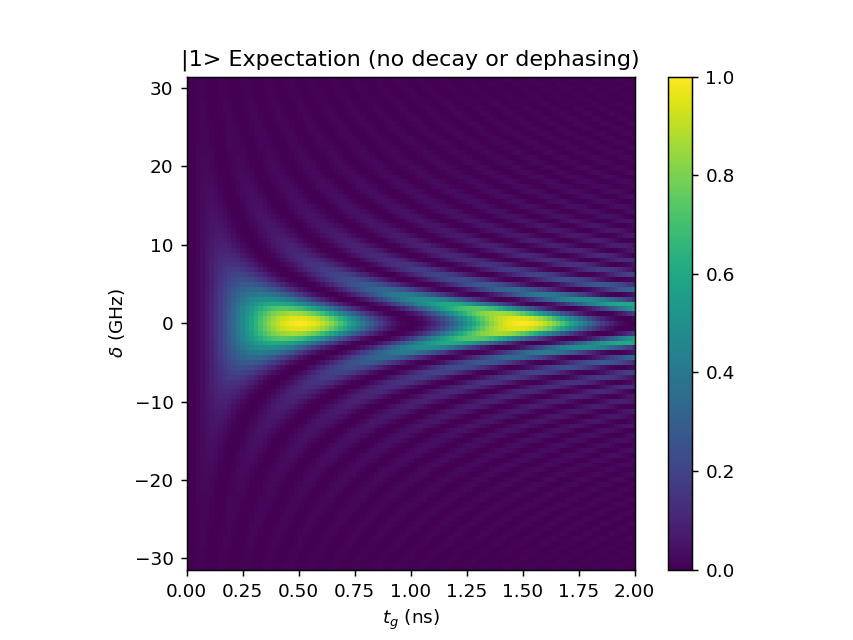

In [44]:
f1 = plt.figure()
plt.imshow(data,extent = [t_list[0] * 1e9, t_list[-1] * 1e9, deltavec[0] * 1e-9, deltavec[-1] * 1e-9],aspect = 0.035,vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$t_g$ (ns)')
plt.ylabel('$\delta$ (GHz)')
plt.title('|1> Expectation (no decay or dephasing)')
plt.show()

<font color='green' size = 5> Problem 2 (c)</font>



In [45]:
#store new data
data1 = np.zeros(shape=(101,101))
# T1
T1 = 1*(10**(-9)) 
# Tphi
Tphi = 1*(10**(-9))
# define c_ops so the full Lindblad master equation can be solved
c_ops  = [np.sqrt(1/T1)*sm , np.sqrt(1/(2*Tphi))*sz];

k = 0;
for i in deltavec:
    delta = i
    def H_Gate(t):
        H_op =  -delta*sz + coeff*sx
        return [H_op, np.ones(len(t))] 
    # define time axis
    t_list = np.linspace(0, 2*(10**(-9)), 101)
    # start the evolution in the |0> state
    initial_state = psi0 
    # solve numerically the Rabi Hamiltonian
    resultforexpectations = qt.mesolve(H_Gate(t_list), initial_state, t_list, c_ops = c_ops, e_ops=[M0, M1])
    # resultforstatevectors = qt.mesolve(H_Rabi(t_list), initial_state, t_list)
    # calculate the expectation values of the measurement operators
    expectations = np.array(resultforexpectations.expect)
    # statevectors = np.array(resultforstatevectors.states)
    p0 = expectations[0]
    p1 = expectations[1]
    data1[k][:] = p1;
    k = k+1 
    

<IPython.core.display.Javascript object>


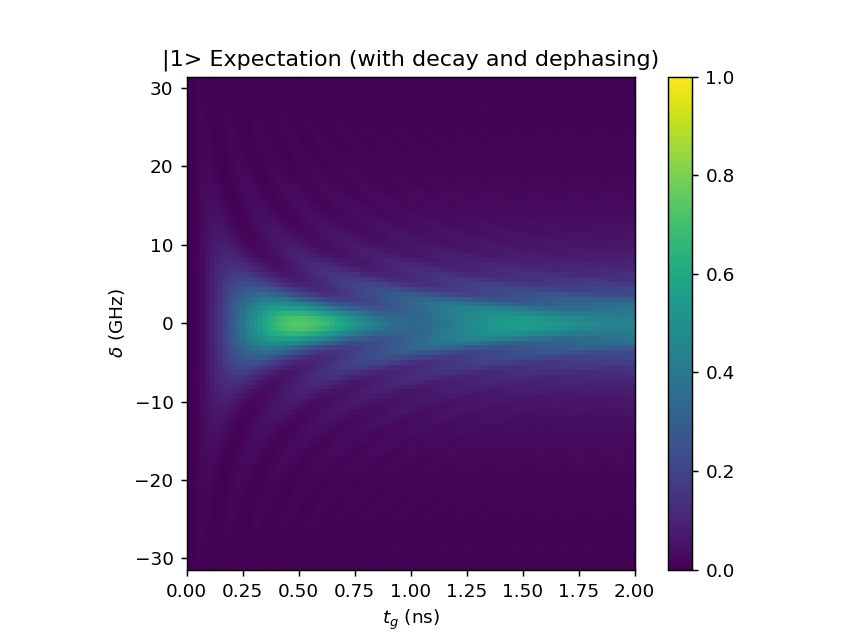

In [46]:
f2 = plt.figure()
plt.imshow(data1,extent = [t_list[0] * 1e9, t_list[-1] * 1e9, deltavec[0] * 1e-9, deltavec[-1] * 1e-9],aspect = 0.035,vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$t_g$ (ns)')
plt.ylabel('$\delta$ (GHz)')
plt.title('|1> Expectation (with decay and dephasing)')
plt.show()